In [ ]:
# ! pip install transformers torchvision pillow

In [9]:
import os
import shutil
import json
import numpy as np
import matplotlib.pyplot as plt

import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

In [2]:
path_to_images = "/content/drive/MyDrive/images_for_classification/"
# path_to_images = "./"

### load images

In [3]:
images = [i for i in os.listdir(path_to_images)[:10] if i.endswith(".jpg") or i.endswith(".png") or i.endswith(".jpeg")]

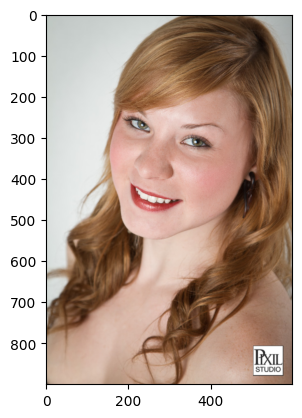

In [4]:
# show n image
n = 0
img = plt.imread(path_to_images + images[n])
plt.imshow(img)


### Prediction

In [7]:
# Load the feature extractor and model
feature_extractor = AutoFeatureExtractor.from_pretrained("rizvandwiki/gender-classification")
model = AutoModelForImageClassification.from_pretrained("rizvandwiki/gender-classification")

/home/codespace/.python/current/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [8]:
def predict_gender(image_path, feature_extractor, model):
    # Check if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move the model to the device
    model = model.to(device)

    # Load an image
    image = Image.open(image_path)

    # Preprocess the image
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Move the inputs to the device
    inputs = {name: tensor.to(device) for name, tensor in inputs.items()}

    # Make predictions
    with torch.no_grad():
        logits = model(**inputs).logits

    # Retrieve the highest probability class
    predicted_class_idx = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_class_idx]
    
    return predicted_class

In [14]:
for image in images:
  if ("male" not in image) and ("female" not in image):
    if len(np.array(Image.open(path_to_images + image))) == 3:
      # print(image)
      an = predict_gender(path_to_images + image, feature_extractor, model)
      # rename file to (n) an
      shutil.move(path_to_images + image, path_to_images + an + "-" + image)
      # write name
      with open("/".join(path_to_images.split("/")[:-2]) + "/json_data.jsonl", "a") as f:
          f.write(json.dumps({"file": an + "-" + image, "type": an + "-" + image}) + "\n")